In [4]:
import pandas as pd
from pathlib import Path

from pyfinopt.data import Portfolio
from pyfinopt.optimizers import VolatilityOptimizer
from pyfinopt.optimizers import ReturnOptimizer
from pyfinopt.optimizers import SharpeOptimizer
from pyfinopt.optimizers import EfficientRiskOptimizer
from pyfinopt.optimizers import EfficientReturnOptimizer
from pyfinopt.optimizers import MaximumDiversificationOptimizer


### Loading data

In [5]:
csv_paths = Path('data').glob('*.csv')
stocks = pd.DataFrame()

for path in csv_paths:
    _stocks = pd.read_csv(path, parse_dates=True).sort_values('date')
    _stocks['close'] = _stocks['close'].pct_change()
    stocks = pd.concat([stocks, _stocks]).dropna()

in the data folder I have prepared in advance the yields of some shares of Russian companies. Lets have a look at it.

In [8]:
stocks.head()

,date,close,ticker
1,2021-03-23,0.009219,gazp.me
2,2021-03-24,0.005553,gazp.me
3,2021-03-25,-0.003251,gazp.me
4,2021-03-26,0.009561,gazp.me
5,2021-03-29,0.011417,gazp.me


To keep things simple we assume that vectors of returns of each company has same length. So there are 249 trading days of equity:

In [9]:
stocks.value_counts('ticker')

ticker
gazp.me    249
lkoh.me    249
mtss.me    249
plzl.me    249
sber.me    249
dtype: int64

now lets instanciate portfolio with those equities:

In [11]:
portfolio = Portfolio.from_pandas(stocks=stocks, ticker_col='ticker', returns_col='close')
print(portfolio)

Portfolio(stocks=5, optimized=False, tickers=('gazp.me', 'lkoh.me', 'mtss.me', 'plzl.me', 'sber.me'))


Since task is to perform some optimization with provided returns, we dont really care about date index and assume it will not be useful later. So now we have a collection of stocks in our portfolio object, lets begin to optimize:

VolatilityOptimizer(optimized=True, value=0.34461446184514616)
{'gazp.me': 0.0, 'lkoh.me': 0.0, 'mtss.me': 1.0, 'plzl.me': 4.163336342344337e-17, 'sber.me': 1.2729326481610878e-17}


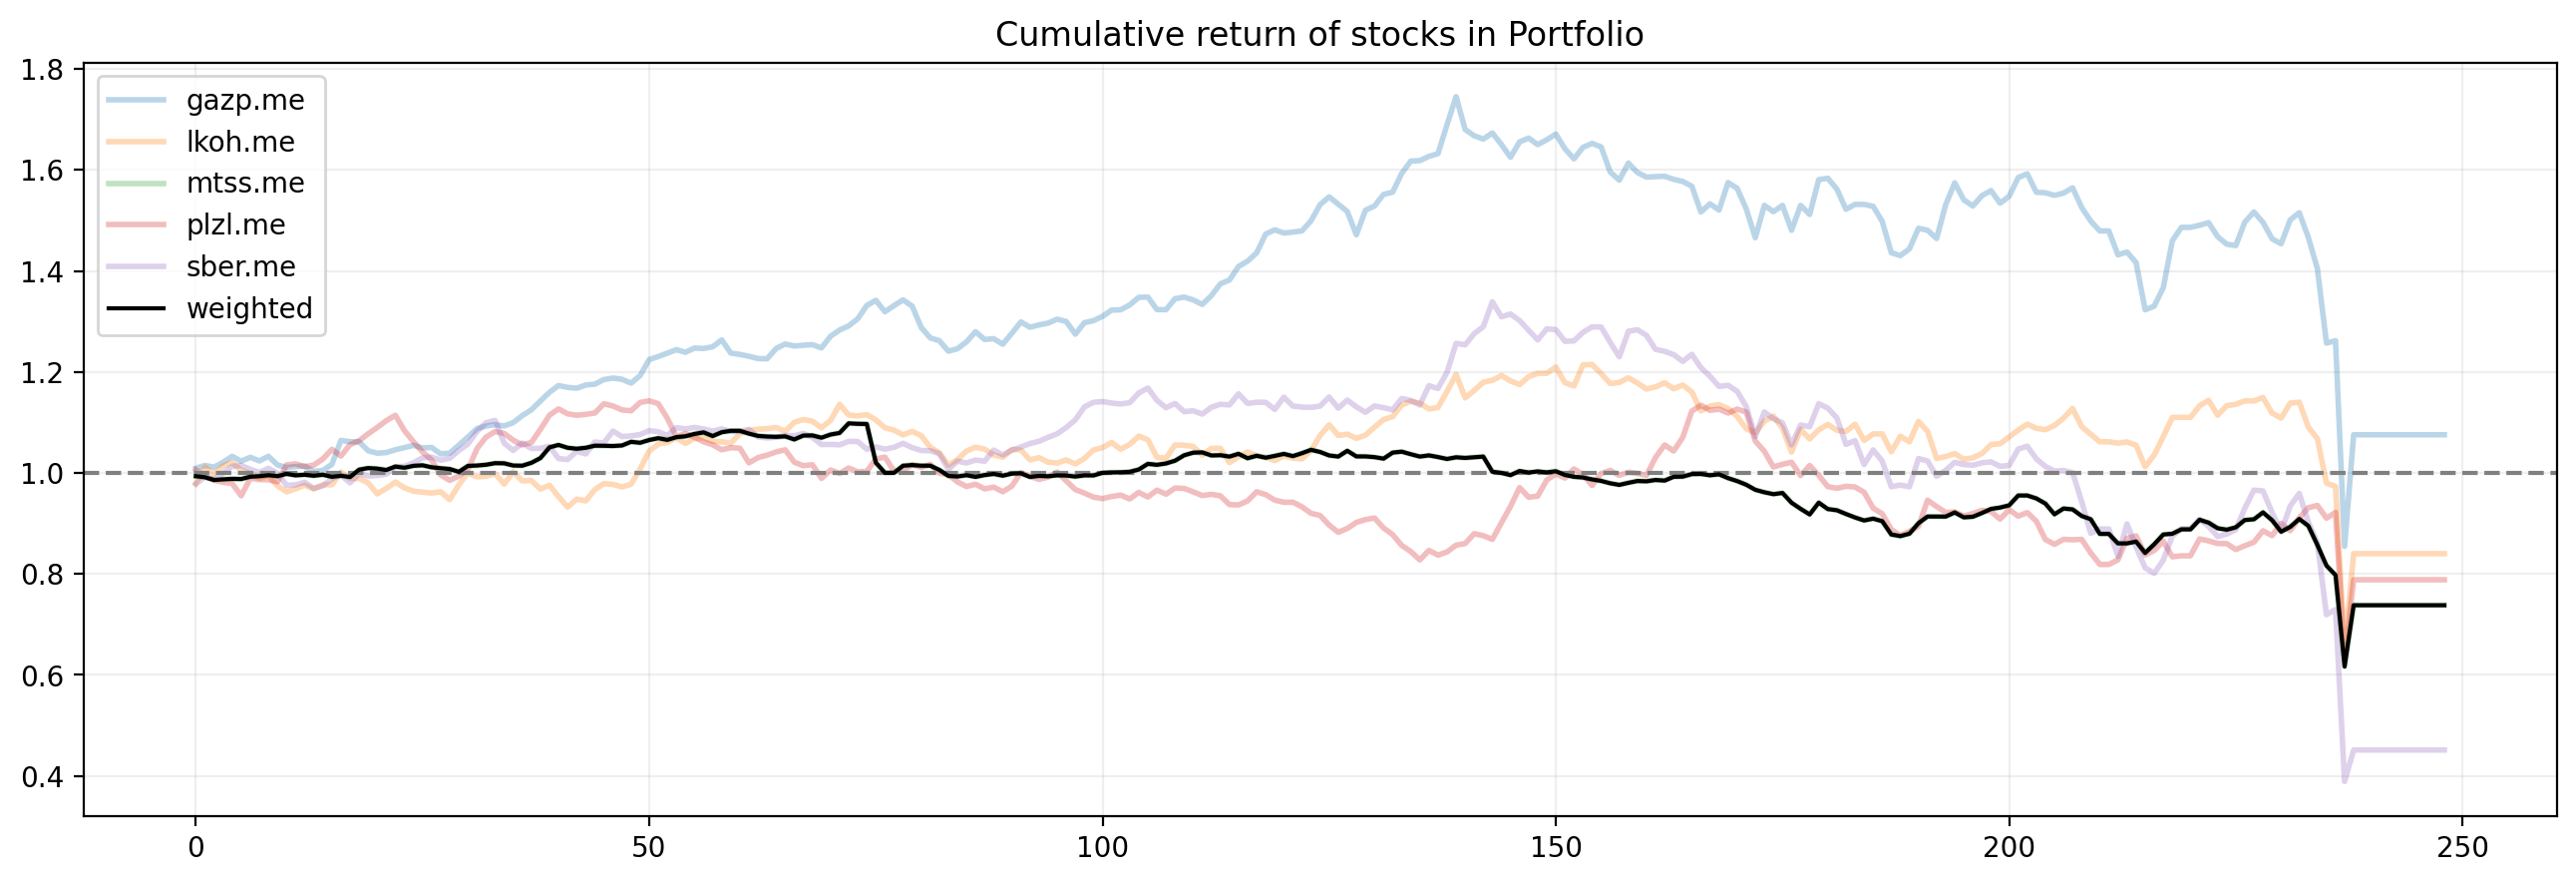

In [14]:
opt = VolatilityOptimizer(portfolio)
opt.optimize()

print(opt)
print(opt.weights)

portfolio.set_weights(opt.weights)
portfolio.plot()

ReturnOptimizer(optimized=True, value=-0.5648913512840484)
{'gazp.me': 3.132470032390653e-16, 'lkoh.me': 3.675741898047814e-16, 'mtss.me': 8.187894806610529e-16, 'plzl.me': 6.050420231327382e-16, 'sber.me': 0.999999999999998}


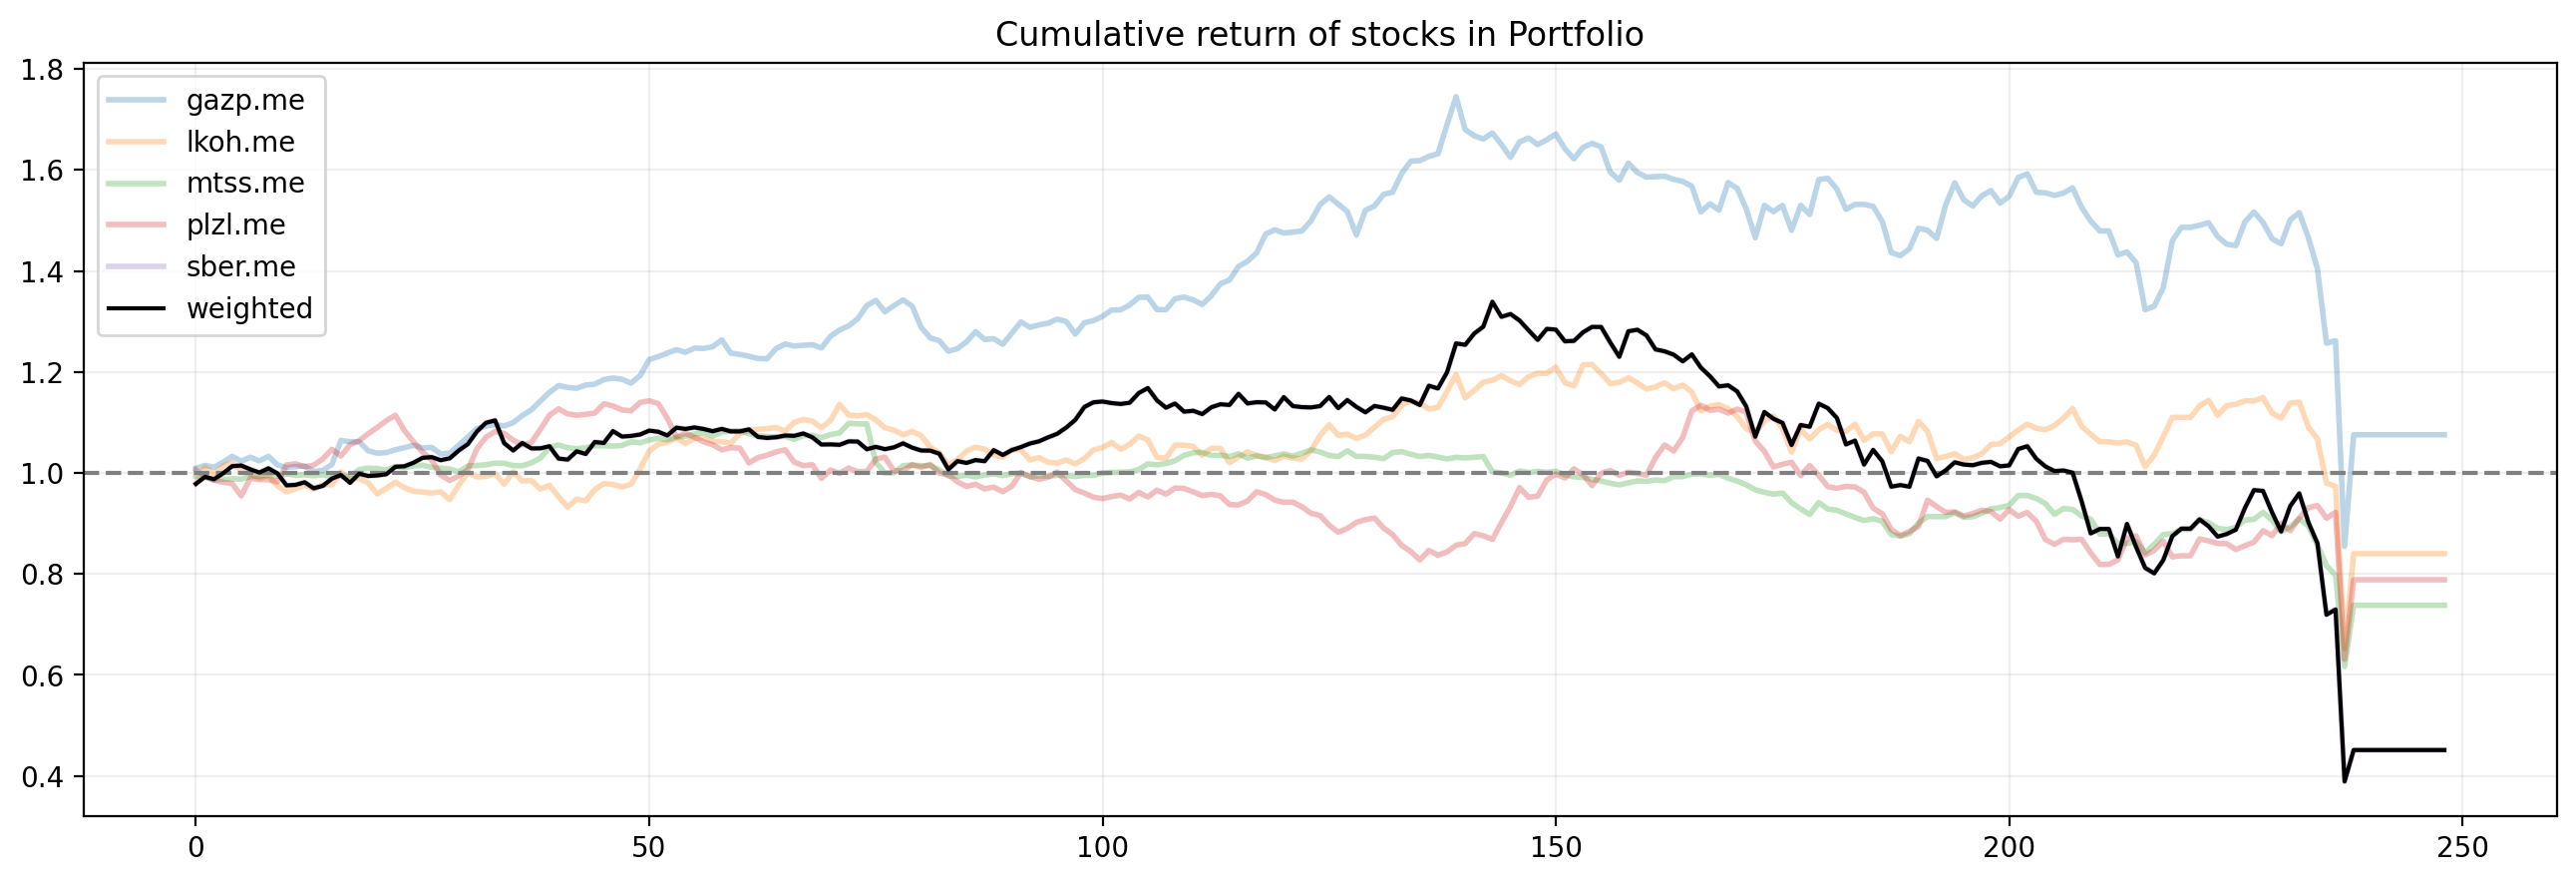

In [15]:
opt = ReturnOptimizer(portfolio)
opt.optimize()

print(opt)
print(opt.weights)

portfolio.set_weights(opt.weights)
portfolio.plot()

SharpeOptimizer(optimized=True, value=-0.41874553971040473)
{'gazp.me': 0.9999999999999987, 'lkoh.me': 4.163336342344337e-16, 'mtss.me': 4.85722573273506e-16, 'plzl.me': 1.5265566588595902e-16, 'sber.me': 4.163336342344337e-16}


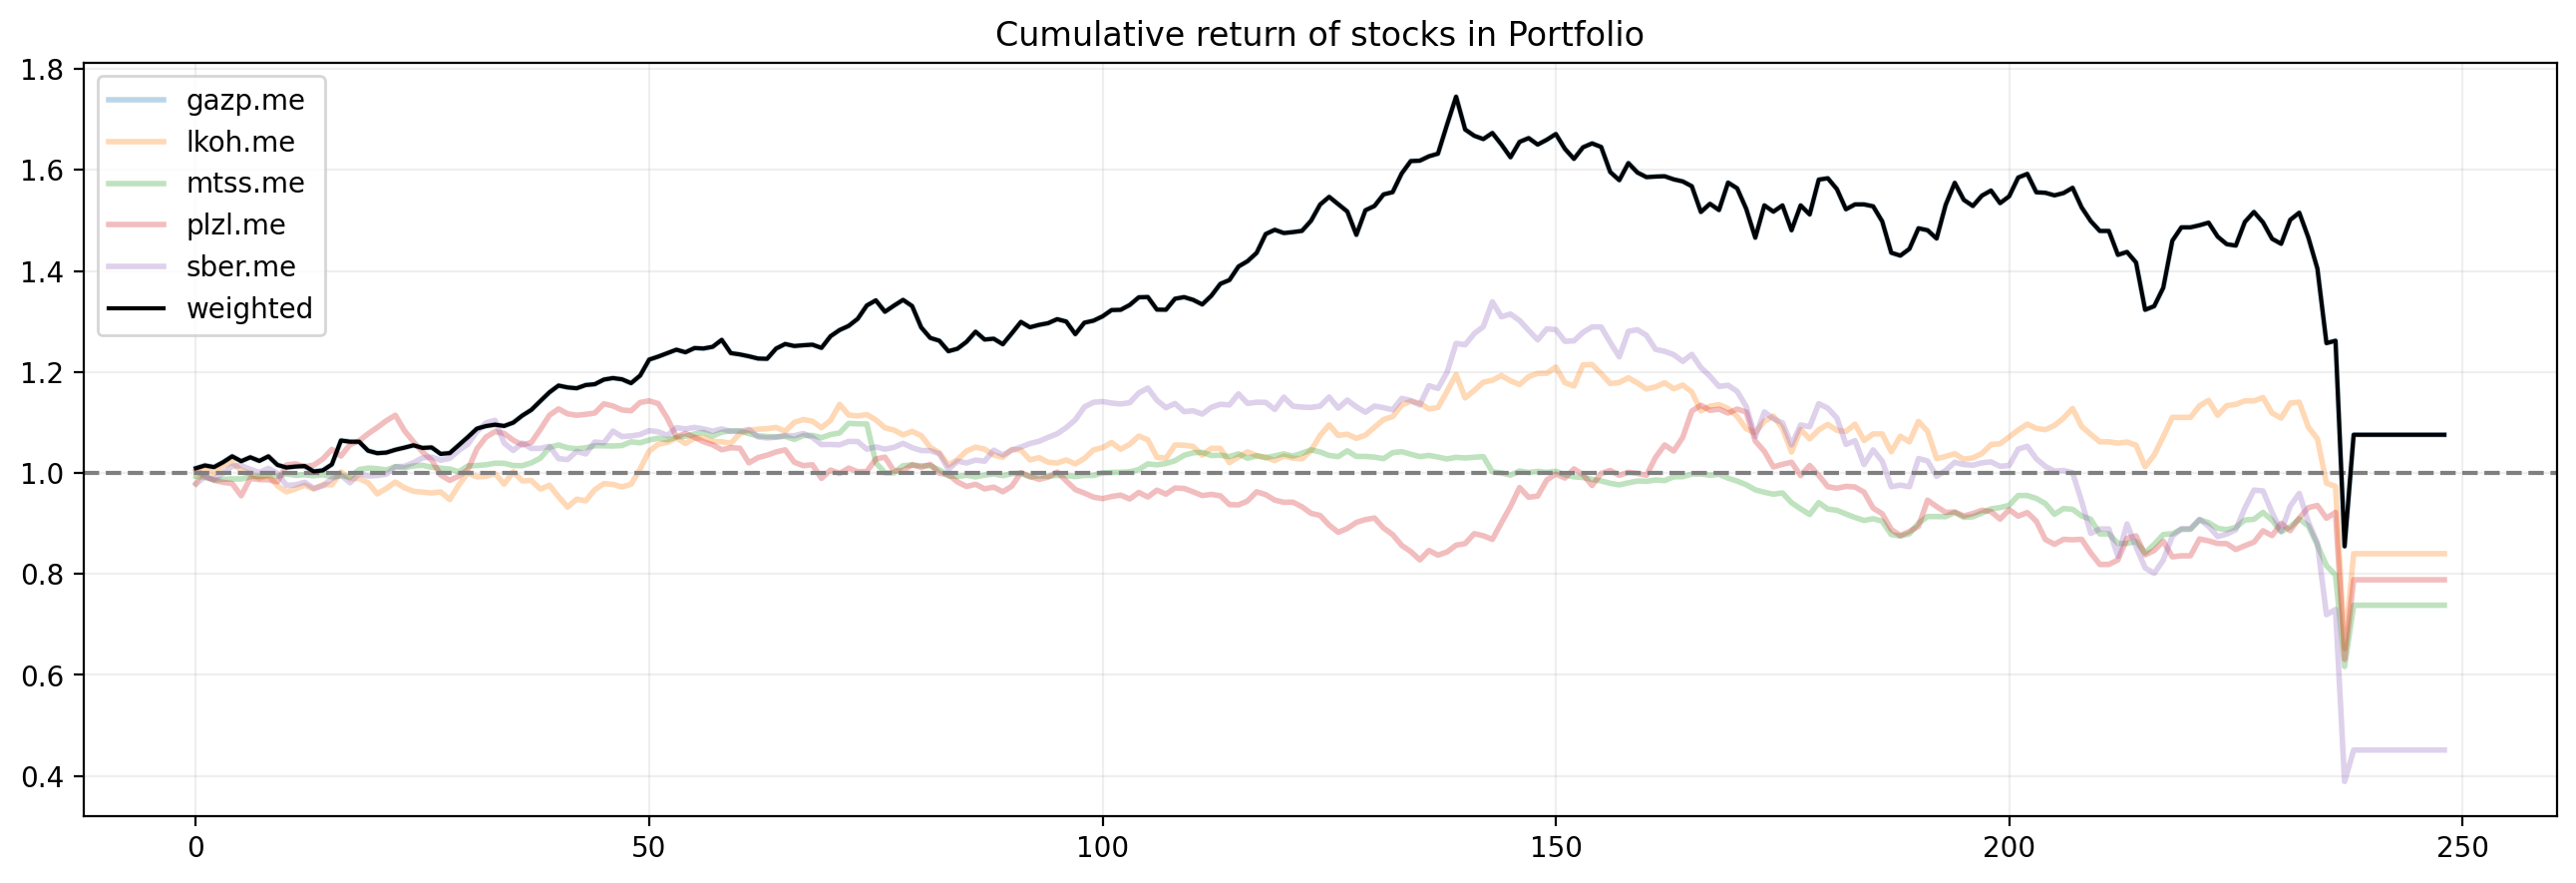

In [16]:
opt = SharpeOptimizer(portfolio)
opt.optimize()

print(opt)
print(opt.weights)

portfolio.set_weights(opt.weights)
portfolio.plot()

### Efficiency optimizers

EfficientRiskOptimizer(optimized=True, value=0.41499095093666877)
{'gazp.me': 0.5396008937772145, 'lkoh.me': 0.0, 'mtss.me': 0.46039910622278585, 'plzl.me': 0.0, 'sber.me': 2.8189256484623115e-17}


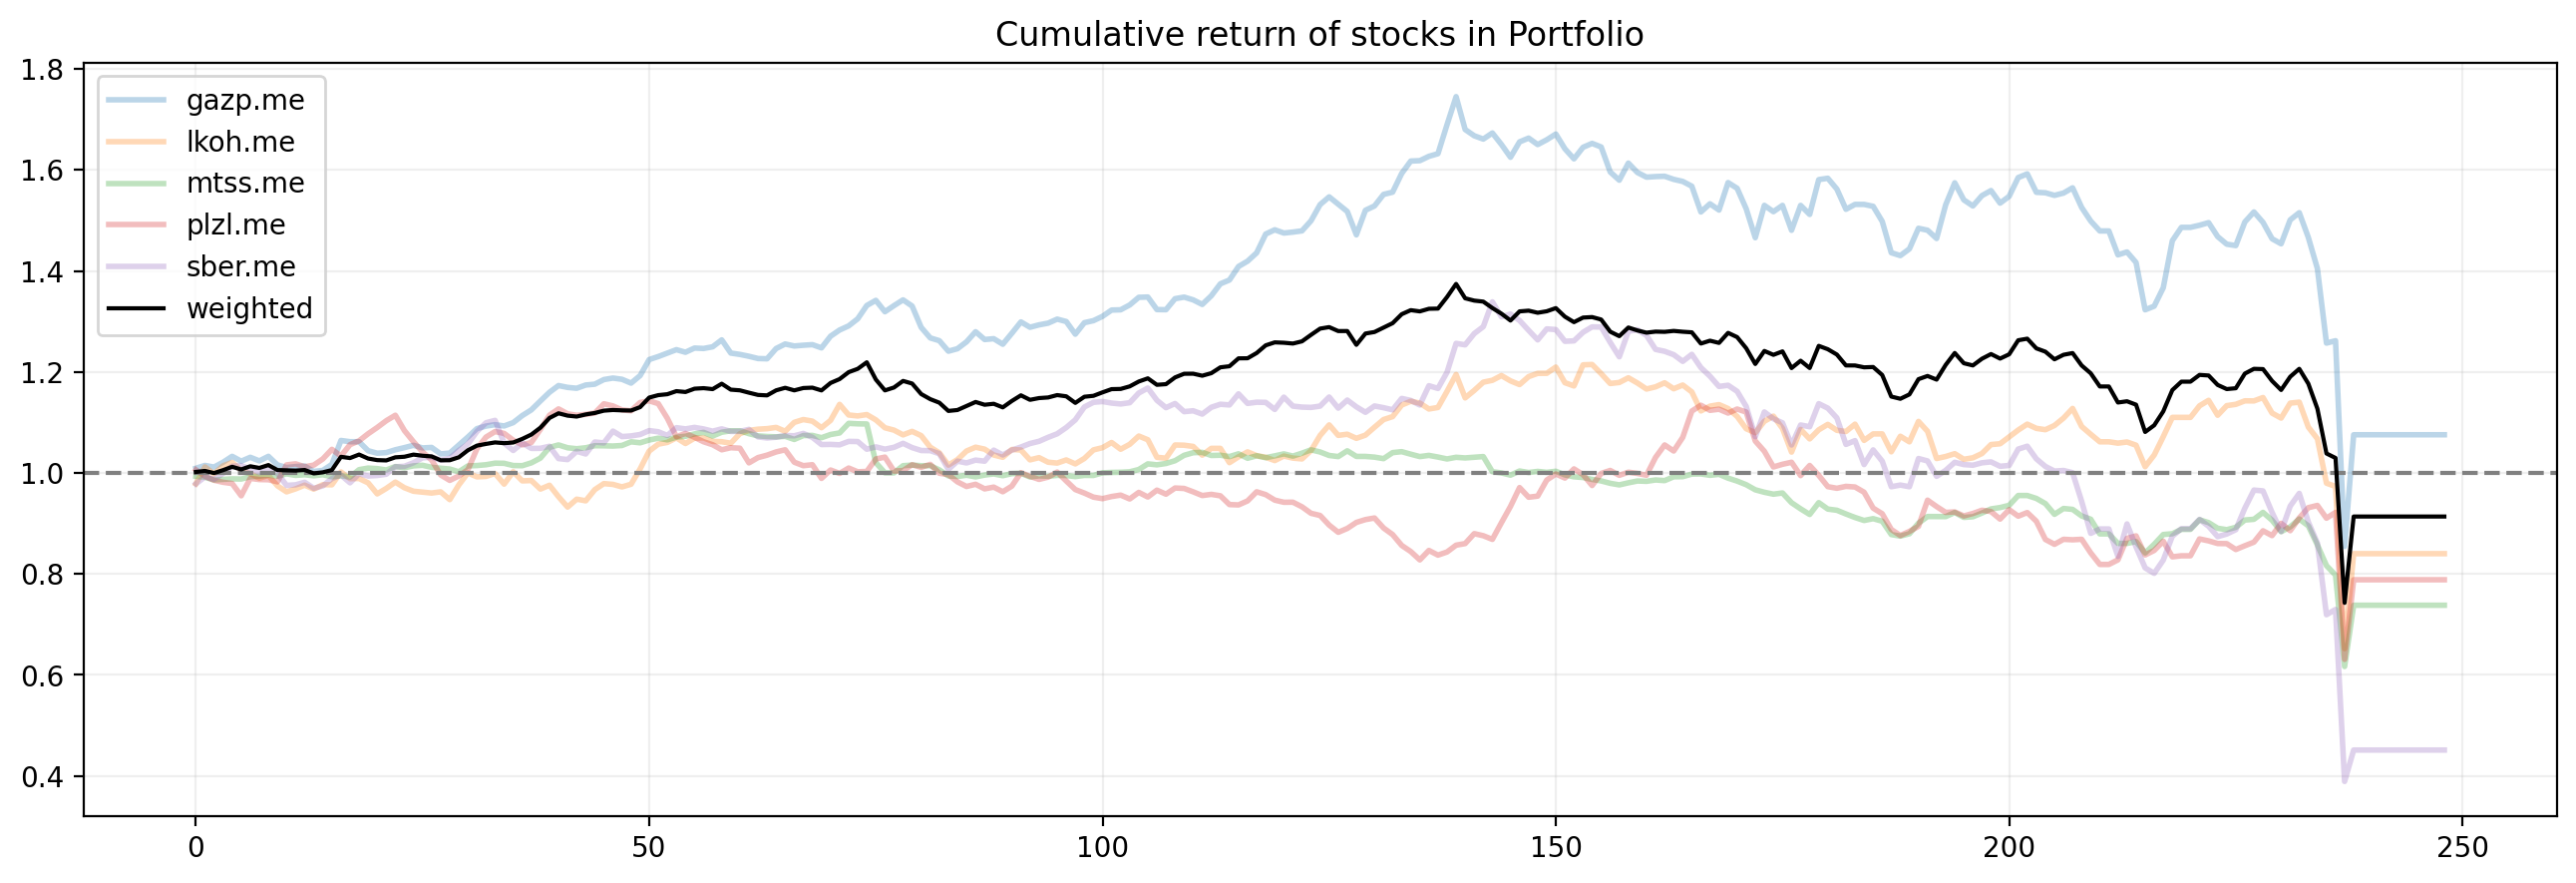

In [18]:
opt = EfficientRiskOptimizer(target_return=0, portfolio=portfolio)
opt.optimize()

print(opt)
print(opt.weights)

portfolio.set_weights(opt.weights)
portfolio.plot()

EfficientReturnOptimizer(optimized=True, value=-0.24675522117194057)
{'gazp.me': 9.976021454798091e-14, 'lkoh.me': 3.8991867692769753e-13, 'mtss.me': 0.999999999999684, 'plzl.me': 8.930829689035184e-13, 'sber.me': 1.382904740178809e-18}


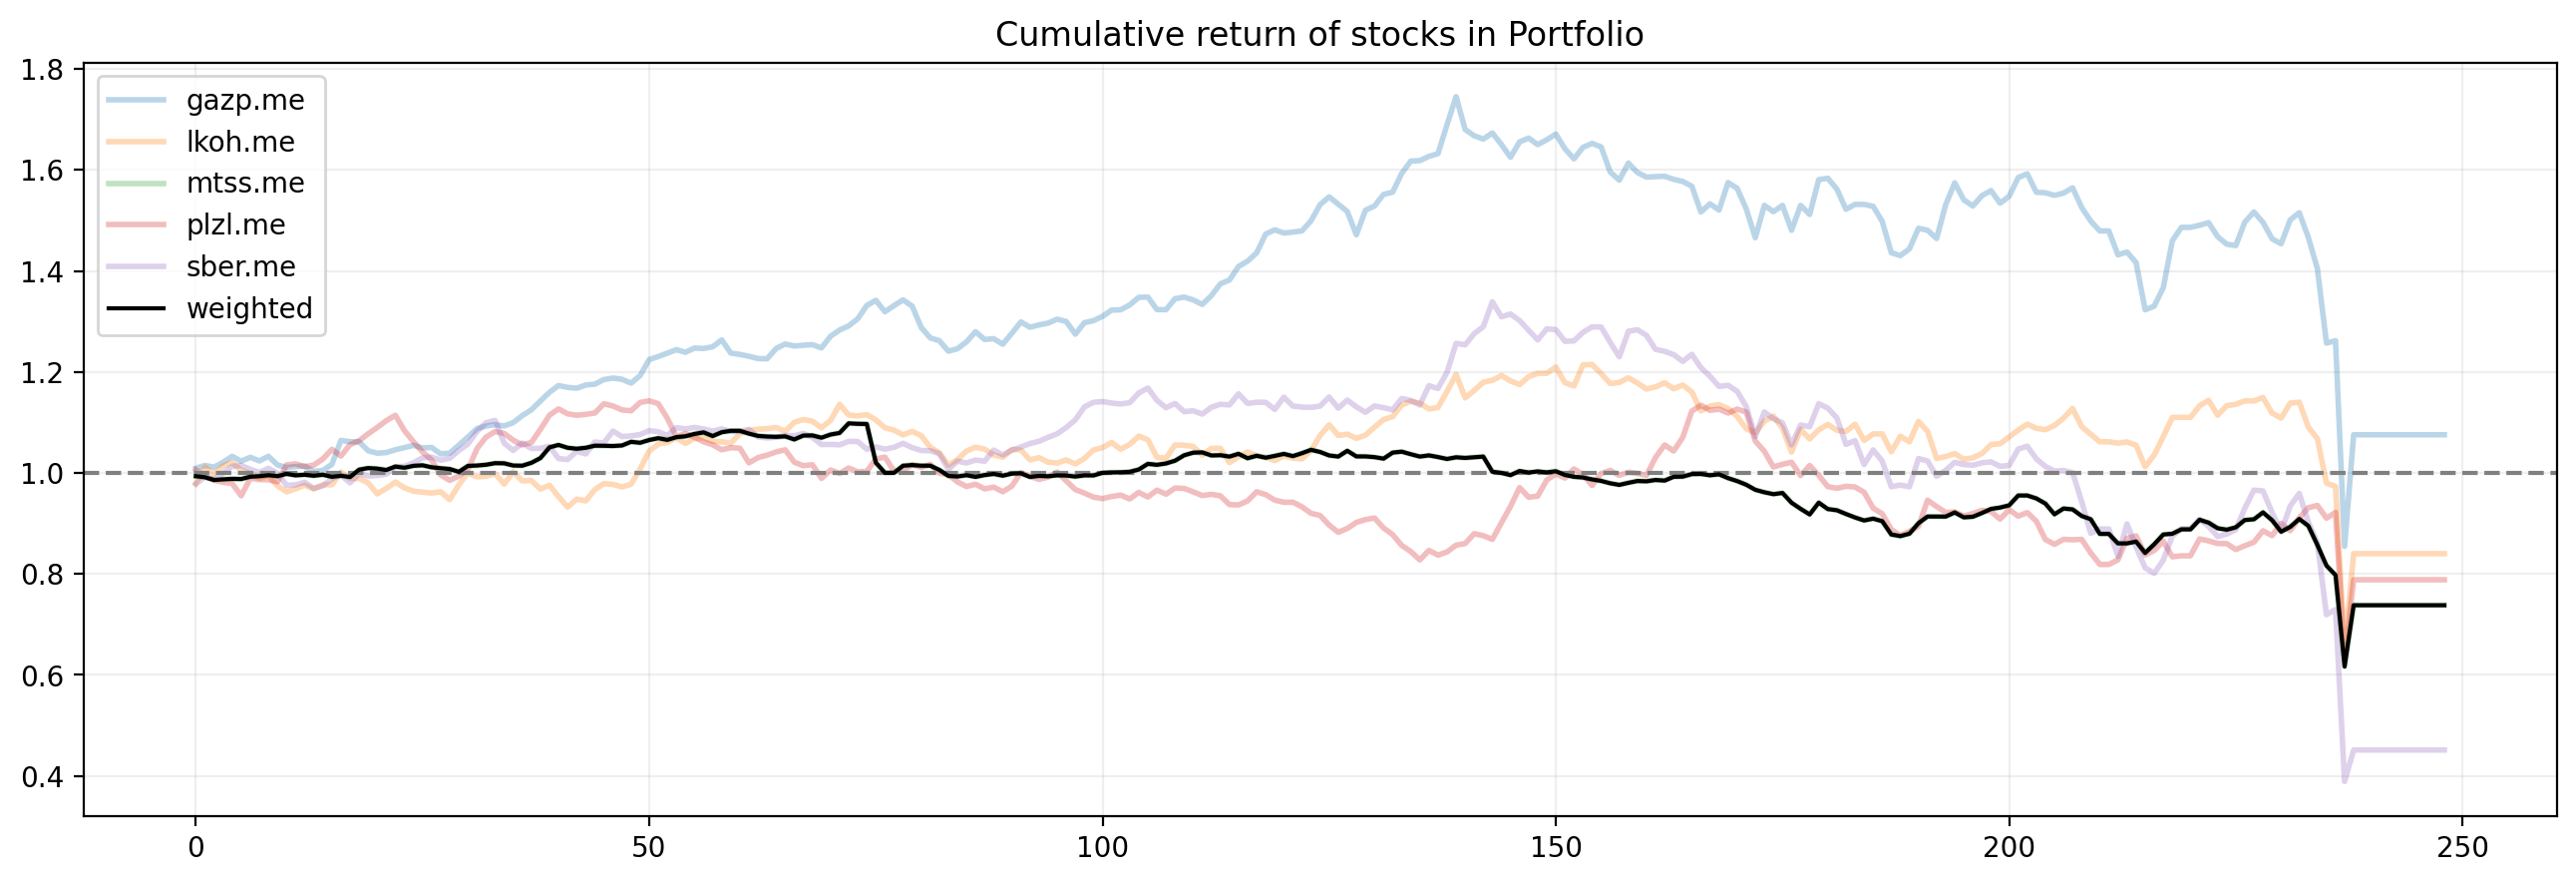

In [19]:
opt = EfficientReturnOptimizer(target_risk=0, portfolio=portfolio)
opt.optimize()

print(opt)
print(opt.weights)

portfolio.set_weights(opt.weights)
portfolio.plot()

MaximumDiversificationOptimizer(optimized=True, value=-0.06921945982583107)
{'gazp.me': 0.06943148332149328, 'lkoh.me': 0.13812029244540006, 'mtss.me': 0.15260705817675113, 'plzl.me': 0.3923680561955009, 'sber.me': 0.24747310986085466}


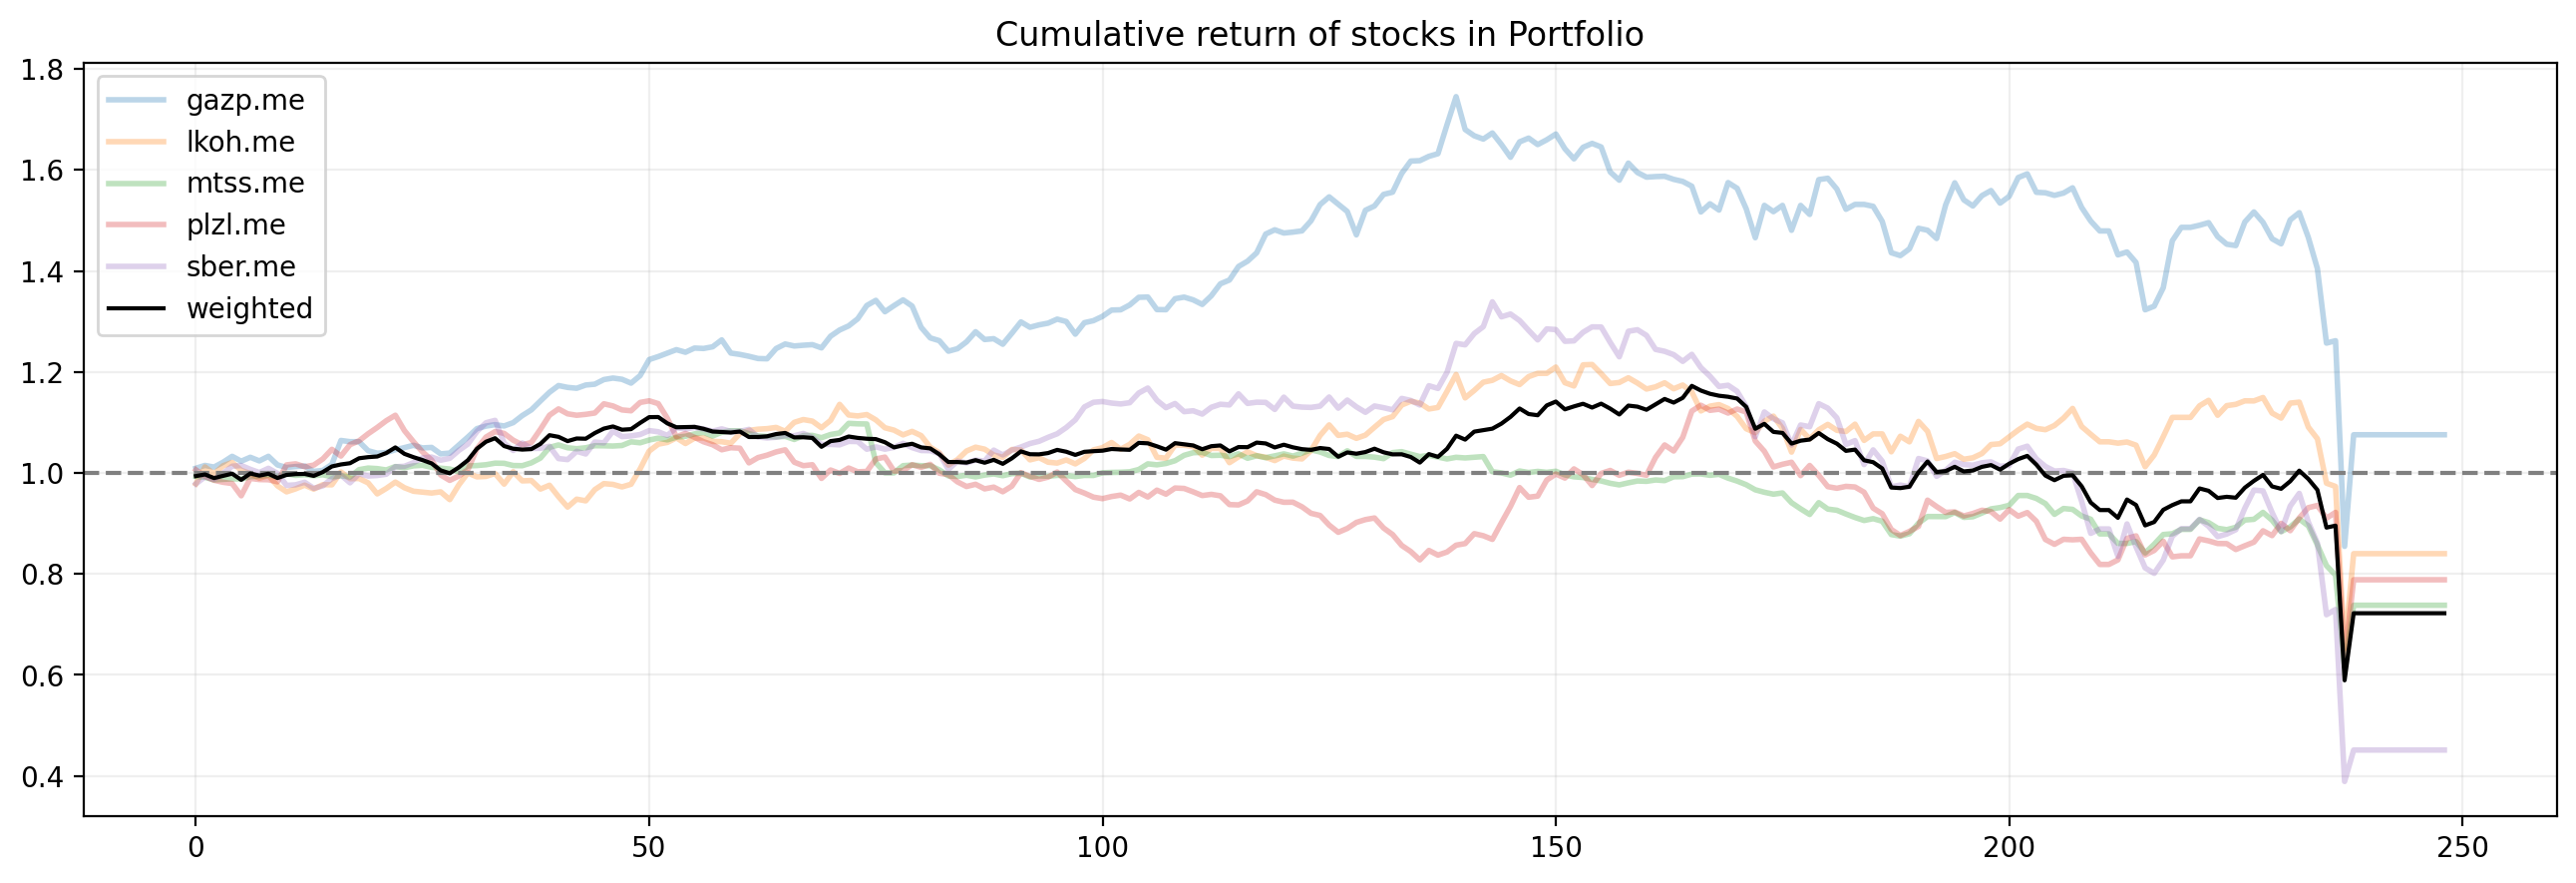

In [20]:
opt = MaximumDiversificationOptimizer(portfolio=portfolio)
opt.optimize()

print(opt)
print(opt.weights)

portfolio.set_weights(opt.weights)
portfolio.plot()